In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=13WpQRYkUI61b2YjraEOddCS_N3Bcb5Rh'


In [4]:
fluff, id = link.split('=')
print (id) # Verify that you 

13WpQRYkUI61b2YjraEOddCS_N3Bcb5Rh


In [0]:
import pandas as pd
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('bitstampUSD_1-min_data_2012-01-01_to_2019-03-13.csv')  
df = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2019-03-13.csv')

In [6]:
print(list(df.columns), "\nSHAPE ::", df.shape)
for i in df.columns:
    print(i, "::", df[i].dtype)

# Declaring number for random state for reproducibility
rstate=123
    
df.describe()

['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price'] 
SHAPE :: (3778817, 8)
Timestamp :: int64
Open :: float64
High :: float64
Low :: float64
Close :: float64
Volume_(BTC) :: float64
Volume_(Currency) :: float64
Weighted_Price :: float64


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,3.778817e+06,2.551132e+06,2.551132e+06,2.551132e+06,2.551132e+06,2.551132e+06,2.551132e+06,2.551132e+06
mean,1.438908e+09,2.654668e+03,2.656783e+03,2.652286e+03,2.654650e+03,1.068140e+01,2.395856e+04,2.654510e+03
std,6.561491e+07,3.529553e+03,3.533184e+03,3.525347e+03,3.529522e+03,3.476243e+01,8.829950e+04,3.529271e+03
min,1.325318e+09,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00
25%,1.382000e+09,3.489800e+02,3.491500e+02,3.487800e+02,3.489900e+02,4.500000e-01,2.480382e+02,3.489681e+02
50%,1.439071e+09,6.595600e+02,6.600000e+02,6.589900e+02,6.596200e+02,2.095163e+00,1.814312e+03,6.595521e+02
75%,1.495753e+09,4.045492e+03,4.049115e+03,4.042050e+03,4.045400e+03,8.284949e+00,1.303504e+04,4.045115e+03
max,1.552435e+09,1.966576e+04,1.966600e+04,1.964996e+04,1.966575e+04,5.853852e+03,5.483271e+06,1.966330e+04


In [0]:
a = df[["Close","Open"]].fillna(method="backfill")
a=(a.Close+a.Open)/2



In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

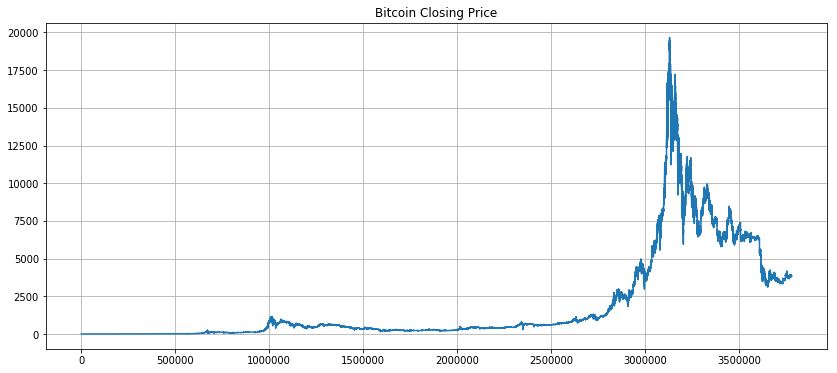

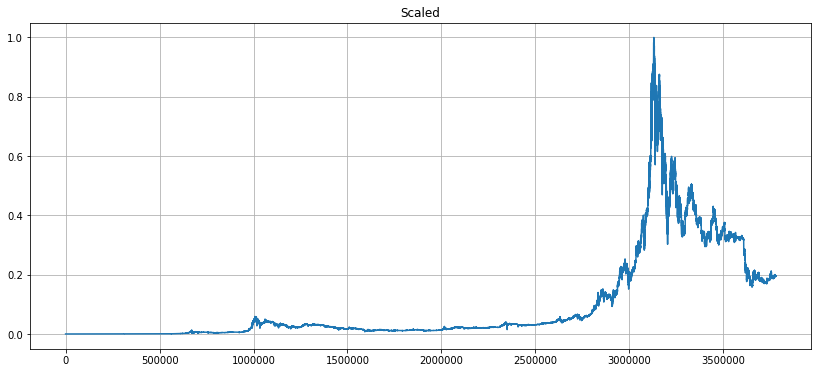

In [9]:
close_price = np.array(a).reshape(-1,1)
plt.figure(figsize=(14,6))
plt.title("Bitcoin Closing Price")
plt.grid()
plt.plot(close_price)

sc = MinMaxScaler()
close_priceSC = sc.fit_transform(close_price)
plt.figure(figsize=(14,6))
plt.title("Scaled")
plt.grid()
plt.plot(close_priceSC)

In [10]:

X = []
y = []
for i in range(45, len(close_priceSC)):
    X.append(close_priceSC[i-45:i, 0])
    y.append(close_priceSC[i,0])
X, y = np.array(X), np.array(y)
print(X.shape, y.shape)

(3778772, 45) (3778772,)


In [11]:

print(X.shape)
print(y.shape)

(3778772, 45)
(3778772,)


In [12]:
X_train = X[:3300000,:]
X_test = X[3300000:,:]

y_train = y[:3300000]
y_test = y[3300000:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(3300000, 45)
(478772, 45)
(3300000,)
(478772,)


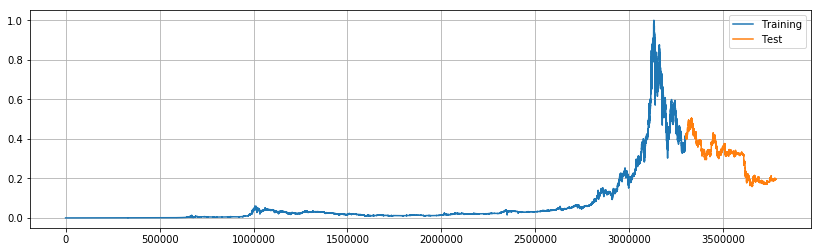

In [13]:
plt.figure(figsize=(14,4))
plt.plot(range(3300000),y_train)
plt.plot(range(3300000, len(y)), y_test)
plt.legend(["Training", "Test"])
plt.grid()

In [0]:
X_train = X_train.reshape(-1,45,1)
X_test = X_test.reshape(-1,45,1)

In [15]:

%%time
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.layers.recurrent import LSTM
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.5))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.5))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='adam', loss='mean_absolute_error')
# Fitting to the training set
regressor.fit(X_train, y_train, epochs=1, batch_size=500)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/1
3300000/3300000 [==============================] - 1649s 500us/step - loss: 0.0077
CPU times: user 37min 43s, sys: 2min 20s, total: 40min 3s
Wall time: 27min 33s


In [16]:
%%time
y_pred = regressor.predict(X_test)

CPU times: user 34min 46s, sys: 2min 50s, total: 37min 36s
Wall time: 22min 56s


In [0]:
def systematic_mean_absolute_percentage_error(y_true, y_pred):
    n = y_true.shape[0]
    res = 0
    for i in range(n):
        num = np.abs(y_pred[i] - y_true[i])
        dem = (np.abs(y_true[i]) + np.abs(y_pred[i]))/2
        res += num/dem
    res = np.squeeze(res)
    return 100*(res/n)

In [0]:
def mean_absolute_scaled_error(y_true, y_pred):
    n = y_true.shape[0]
    res = 0
    dem = 0
    num = 0
    for i in range(n-1):
        dem += y_true[i+1] - y_true[i]
    for i in range(n):
        num = abs(y_pred[i] - y_true[i])
        num = np.squeeze(num)
        res += num/dem
    res = np.squeeze(res)
    #print(num, dem, res)
    return res/n

In [19]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
MSE

0.00024118538885824114

NameError: ignored

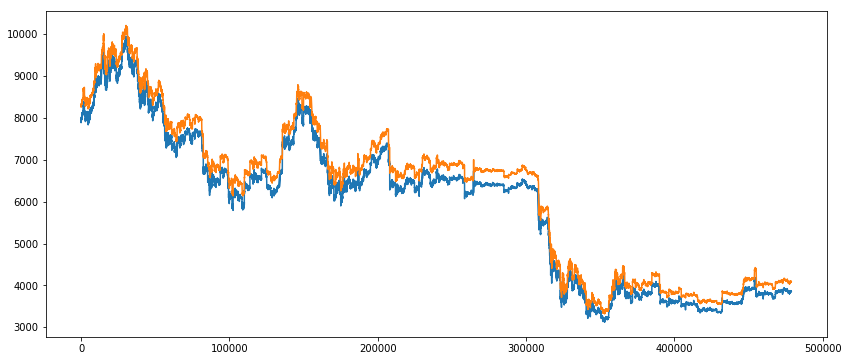

In [20]:
plt.figure(figsize=(14,6))
plt.plot(sc.inverse_transform(y_test.reshape(-1,1)))
plt.plot(sc.inverse_transform(y_pred.reshape(-1,1)))
plt.title("Comparison with MAE {0:0.10f}".format(MAE))
plt.legend(["Y", "Prediction"])
plt.xlabel("Timeframe")
plt.ylabel("Price")

In [24]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
MSE

0.00024118538885824114

Text(0, 0.5, 'Price')

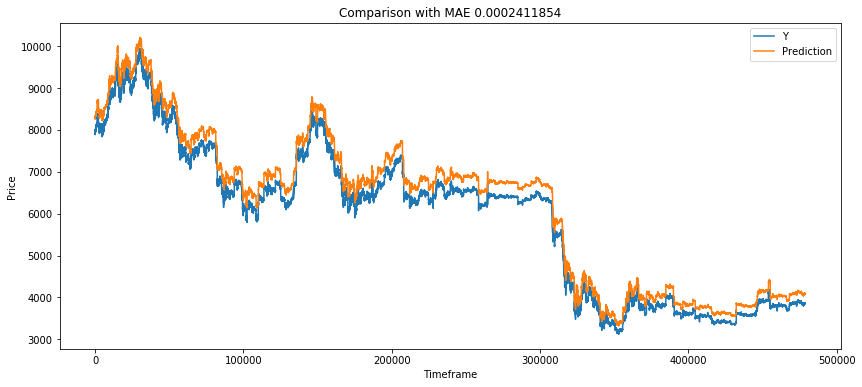

In [25]:
plt.figure(figsize=(14,6))
plt.plot(sc.inverse_transform(y_test.reshape(-1,1)))
plt.plot(sc.inverse_transform(y_pred.reshape(-1,1)))
plt.title("Comparison with MAE {0:0.10f}".format(MSE))
plt.legend(["Y", "Prediction"])
plt.xlabel("Timeframe")
plt.ylabel("Price")

In [26]:
SMAPE = systematic_mean_absolute_percentage_error(y_test, y_pred)
SMAPE

5.142356300989824

Text(0, 0.5, 'Price')

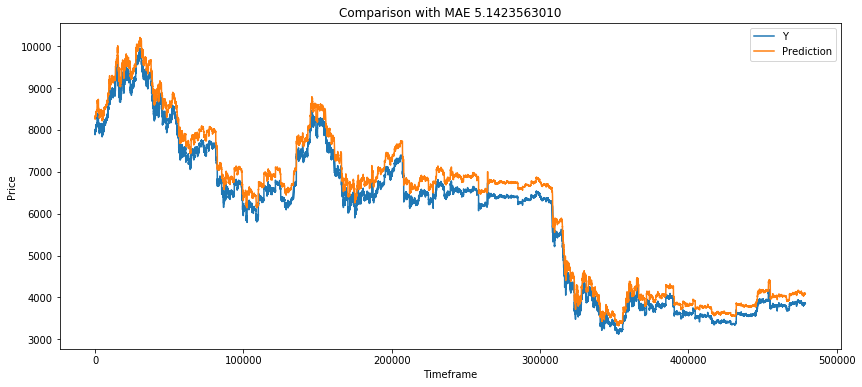

In [27]:
plt.figure(figsize=(14,6))
plt.plot(sc.inverse_transform(y_test.reshape(-1,1)))
plt.plot(sc.inverse_transform(y_pred.reshape(-1,1)))
plt.title("Comparison with MAE {0:0.10f}".format(SMAPE))
plt.legend(["Y", "Prediction"])
plt.xlabel("Timeframe")
plt.ylabel("Price")

In [28]:
MASE = mean_absolute_scaled_error(y_test, y_pred)
MASE

-0.0732564847061298

Text(0, 0.5, 'Price')

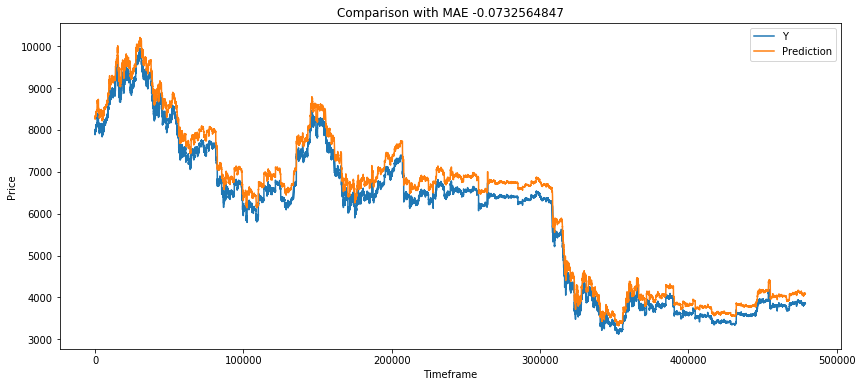

In [29]:
plt.figure(figsize=(14,6))
plt.plot(sc.inverse_transform(y_test.reshape(-1,1)))
plt.plot(sc.inverse_transform(y_pred.reshape(-1,1)))
plt.title("Comparison with MAE {0:0.10f}".format(MASE))
plt.legend(["Y", "Prediction"])
plt.xlabel("Timeframe")
plt.ylabel("Price")

## Correlation between attributes

## Open And Low Price

Correlation of open and low Price:  0.9999985050598406


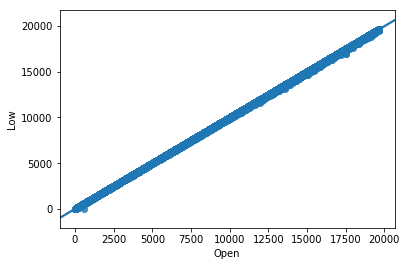

In [53]:
from scipy.stats import linregress
import seaborn as sns 
correlation = df['Open'].corr(df['Low'])
print("Correlation of open and low Price: ", correlation)

#plt.scatter(df['Open'], df['Low'])
sns.regplot(x=df['Open'],y=df['Low'])
df['Open']=df['Open'].fillna(0)
df['Low']=df['Low'].fillna(0)
a=df['Open']
b=df['Low']

plt.show()



### Correlation Coefficient
-  0.9999985050598406

### Linear Equation Parameters

In [54]:
linregress(a, b)

LinregressResult(slope=0.9988525207582529, intercept=0.4478683006082065, rvalue=0.9999985050598404, pvalue=0.0, stderr=8.884867259548117e-07)

## Open Price And Volume

Correlation of open and Volume_(BTC):  0.03557207926097143


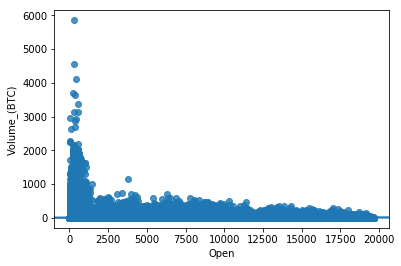

In [55]:
correlation = df['Open'].corr(df['Volume_(BTC)'])
print("Correlation of open and Volume_(BTC): ", correlation)

#plt.scatter(df['Open'], df['Volume_(BTC)'])
sns.regplot(x=df['Open'],y=df['Volume_(BTC)'])
#sns.regplot(x=df['Open'],y=df['Volume_(BTC)'])
df['Open']=df['Open'].fillna(0)
df['Volume_(BTC)']=df['Volume_(BTC)'].fillna(0)
a=df['Open']
b=df['Volume_(BTC)']

plt.show()


### Correlation Coefficient
-  0.03557207926097143

### Linear Equation Parameters

In [56]:
linregress(a, b)

LinregressResult(slope=0.000326906585598995, intercept=6.625278128884499, rvalue=0.03557207926097144, pvalue=0.0, stderr=4.724563133554328e-06)

## Open And Close Price

Correlation of open and close price:  0.999997483083143


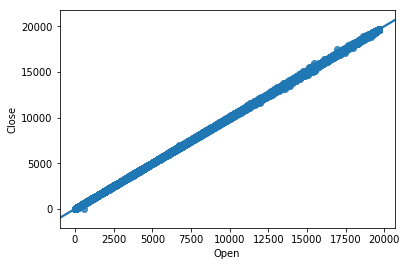

In [57]:
correlation = df['Open'].corr(df['Close'])
print("Correlation of open and close price: ", correlation)

#plt.scatter(df['Open'], df['Volume_(BTC)'])
sns.regplot(x=df['Open'],y=df['Close'])
#sns.regplot(x=df['Open'],y=df['Volume_(BTC)'])
df['Open']=df['Open'].fillna(0)
df['Close']=df['Close'].fillna(0)
a=df['Open']
b=df['Close']
plt.show()

### Correlation Coefficient
- 0.999997483083143

### Linear Equation Parameters

In [58]:
linregress(a, b)

LinregressResult(slope=0.9999894024141888, intercept=0.006765631425423635, rvalue=0.9999978738416605, pvalue=0.0, stderr=1.0607940489371323e-06)

## Relationship Between Different Fields

<table style="width:100%">
  <tr>
    <th>Field Value 1</th>
    <th>Field Value 2</th> 
    <th>Relationship</th>
    <th>Correlation Coefficient</th>  
  </tr>
  <tr>
    <td>Open</td>
    <td>Close</td> 
    <td>Linear</td>
    <td>0.999997483083143</td>
  </tr>
  <tr>
    <td>Open</td>
    <td>Volume_(BTC)</td> 
    <td>Linear</td>
    <td>0.03579047222593227</td>
  </tr>
   <tr>
    <td>Open</td>
    <td>Low</td> 
    <td>Linear</td>
    <td> 0.9999982369583243</td>
  </tr>
</table>
